<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/CNN/ImageHumamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens e Transfer Learning

## Identificação de Imagens de Cães

### Introdução

Neste Jupyter Notebook, você dará os primeiros passos para o desenvolvimento de um algoritmo de Inteligência Artificial que pode ser usado como parte de um aplicativo móvel ou web. Ao final, seu código aceitará qualquer imagem fornecida pelo usuário como entrada. Se um cão for detectado na imagem, o algoritmo fornecerá uma estimativa da raça do cão. Se um ser humano for detectado, fornecerá uma estimativa da raça do cão, que mais se parace com humano (apenas para que possamos nos divertir um pouco). Caso não seja possível detectar nem um cão nem um humano, o algoritmo irá nos informar!

Neste contexto do mundo real, você precisará reunir uma série de modelos para executar tarefas diferentes. Por exemplo, o algoritmo que detecta seres humanos em uma imagem será diferente da CNN que infere a raça de cães. Existem muitos pontos de possível falha, e não existe um algoritmo perfeito. Seu objetivo aqui é aprender sobre classificação de imagens usando Deep Learning. Também usaremos o OpenCV para nos auxiliar na detecção de imagens.

In [23]:
# Certifique-se que a GPU tem memória disponível
!nvidia-smi

Mon Jan 21 01:18:36 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    60W / 149W |   3592MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Detectando Humanos

Usaremos a implementação do OpenCV chamada [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) para detectar faces humanas nas imagens.  O OpenCV oferece vários detectores de faces pré-treinados, armazenados como arquivos XML em [github](https://github.com/opencv/opencv/tree/master/data/haarcascades). Já fizemos o download de um desses detectores e colocamos na pasta `haarcascades`. Vejamos agora como utilizá-lo.

In [0]:
#!pip install opencv-python

In [24]:
# download haarcascades
#!wget https://raw.githubusercontent.com/vladimiralencar/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
!mkdir haarcascades
!mv *.xml haarcascades

--2019-01-21 01:18:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.04s   

2019-01-21 01:18:44 (15.1 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [676709/676709]

mkdir: cannot create directory ‘haarcascades’: File exists


In [25]:
# download human faces
!mkdir HumanImages
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/beyonce.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/beyonce02.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/rihanna.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/rihanna02.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/papa.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/tiririca.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/whindersson-nunes.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/willy_wonka_old.jpg
    
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/harry-meghan.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/Mam_people.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/people.jpeg
!mv *.jpg HumanImages    
!mv *.jpeg HumanImages

mkdir: cannot create directory ‘HumanImages’: File exists
--2019-01-21 01:18:55--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/beyonce.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79583 (78K) [image/jpeg]
Saving to: ‘beyonce.jpg’

beyonce.jpg         100%[===================>]  77.72K  --.-KB/s    in 0.01s   

2019-01-21 01:18:55 (5.61 MB/s) - ‘beyonce.jpg’ saved [79583/79583]

--2019-01-21 01:18:57--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/HumanImages/beyonce02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443...

Número de faces detectadas: 1


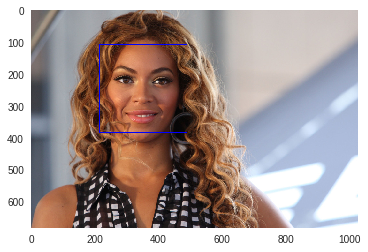

In [26]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               
plt.rcParams['axes.grid'] = False # not white rectangles axes

# Extraindo o detector pré-treinado
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# Carregando imagens BGR
file = 'beyonce02.jpg'
img = cv2.imread("HumanImages/" + file )

# Convertendo para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Buscando faces nas imagens
faces = face_cascade.detectMultiScale(gray)

# Print do número de faces na imagem
print('Número de faces detectadas:', len(faces))

# Obter caixa delimitadora para cada face detectada
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# Converte a imagem BGR em RGB para o plot
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display da imagem
plt.imshow(cv_rgb)
plt.show()

Antes de usar qualquer um dos detectores de face, é um procedimento padrão converter as imagens em escala de cinza.

A função `detectMultiScale` executa o classificador armazenado em `face_cascade` e converte a imagem em escala de cinza como um parâmetro.

No código acima, `faces` é uma matriz numérica de faces detectadas, onde cada linha corresponde a uma face detectada. Cada face detectada é uma matriz 1D com quatro entradas que especificam a caixa delimitadora do rosto detectado. As duas primeiras entradas na matriz (extraídas no código acima como `x` e `y`) especificam as posições horizontal e vertical do canto superior esquerdo da caixa delimitadora. As duas últimas entradas na matriz (extraídas aqui como `w` e `h`) especificam a largura e a altura da caixa.

Podemos usar esse procedimento para escrever uma função que retorna `True` se um rosto humano for detectado em uma imagem e `False` caso contrário. Esta função, apropriadamente chamada `face_detector`, recebe um caminho de arquivo com valor de string para uma imagem como entrada e aparece no bloco de código abaixo.

In [0]:
# Shows a classified image
def show_classified_file(file):
    # ler o arquivo
    img = cv2.imread(file)
    
    # Convertendo para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Buscando faces nas imagens
    faces = face_cascade.detectMultiScale(gray)

    # Print do número de faces na imagem
    print('Número de faces detectadas:', len(faces))

    # Obter caixa delimitadora para cada face detectada
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # Converte a imagem BGR em RGB para o plot
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display da imagem
    plt.imshow(cv_rgb)
    plt.show()

Número de faces detectadas: 1


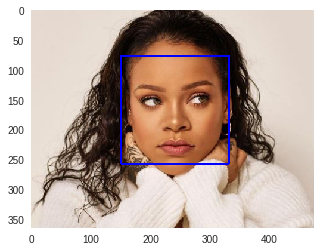




Número de faces detectadas: 1


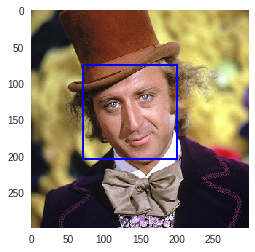




Número de faces detectadas: 2


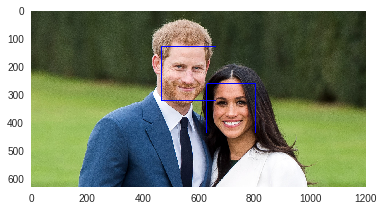




Número de faces detectadas: 1


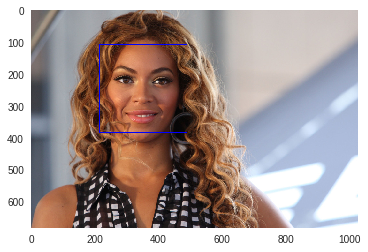




Número de faces detectadas: 7


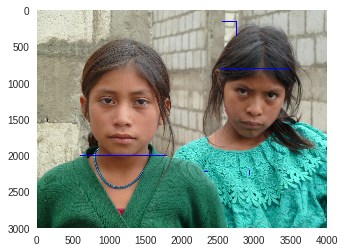

In [28]:
import os
image_path = "HumanImages/" 
files = os.listdir(image_path)

files1 = files[:5]
flles2 = files[5:]

for img in files1:
    show_classified_file(image_path + img)
    print('\n\n')

Número de faces detectadas: 1


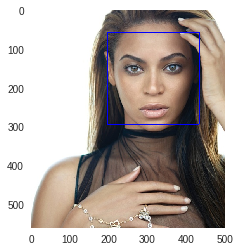




Número de faces detectadas: 5


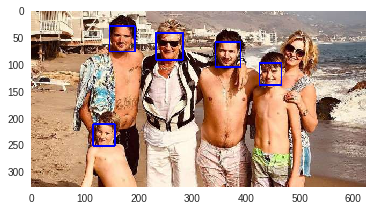




Número de faces detectadas: 1


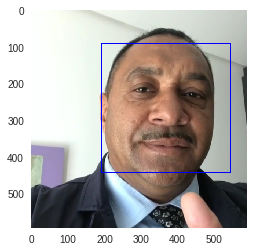




Número de faces detectadas: 1


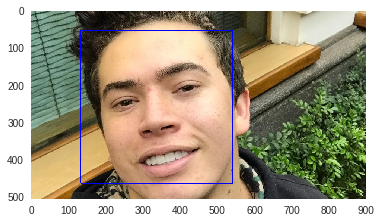




Número de faces detectadas: 1


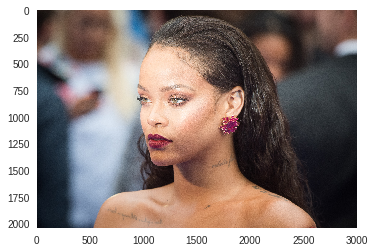

In [29]:
files2 = files[5:]

for img in files2:
    show_classified_file(image_path + img)
    print('\n\n')